# Preprocessing
link - https://www.kaggle.com/code/amirhosseinzinati/adult-income-k-nearest-neighbors-knn (REMOVE BEFORE SUBMIT)

### install & import

In [16]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 724.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 1.9 MB/s eta 0:00:0000:0100:01


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

### Having a sneak pick

In [3]:
data = pd.read_csv("./datasets/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
print(data.shape)

(48842, 15)


### Handling duplicates & empty values

In [5]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [8]:
# Check For Missing Values
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


As we can see there are 52 duplicates, let's drop them.

In [12]:
df = data.copy()
df.dropna(how='any',inplace=True)
df = df.drop_duplicates()
df.shape

(45175, 15)

### Checking problemtic columns

#### Education

In [14]:
print(df['education'].unique())
print(df['educational-num'].unique())

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]


The education column and educational-num are the same but in strings and numbers, we can drop one of them as we like.

#### Capital gain & loss

Text(0.5, 1.0, 'Histogram')

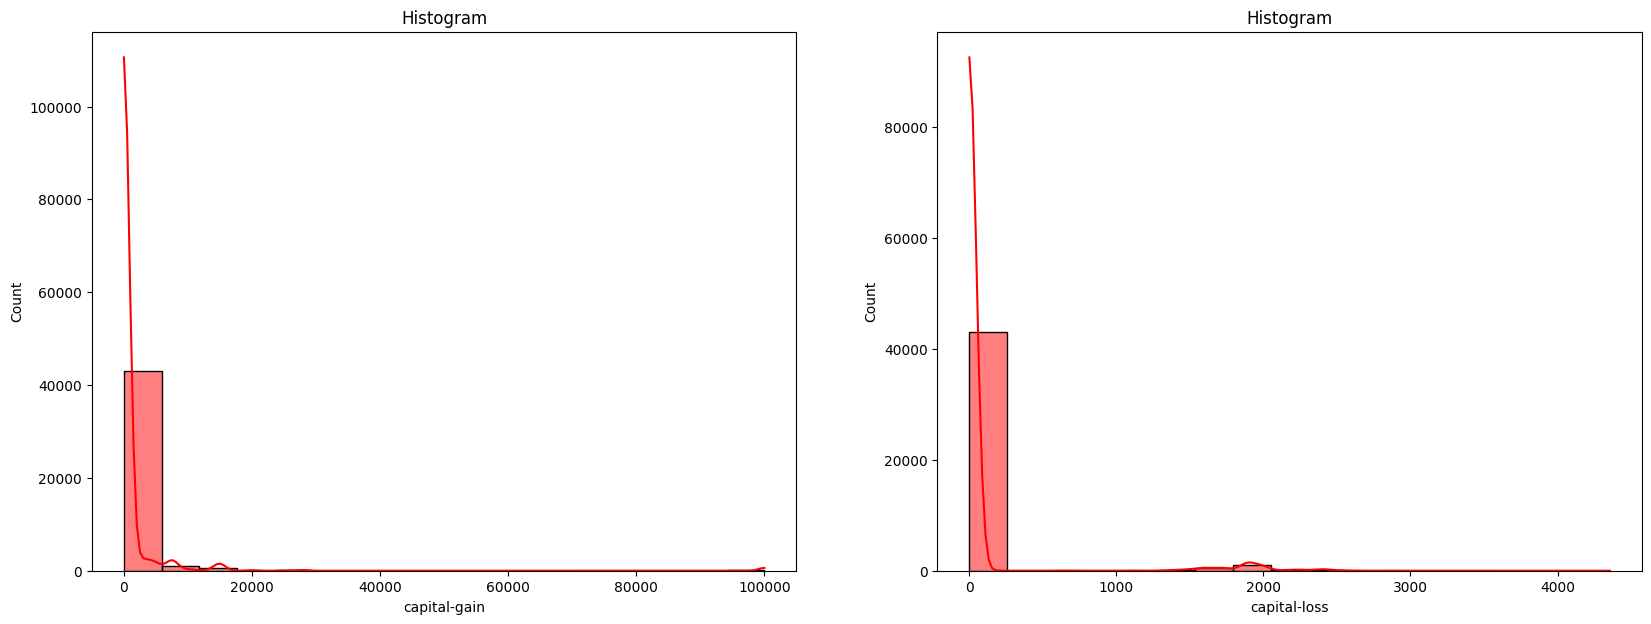

In [15]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

Both columns have 75% of there data as 0.0, we will drop them as well

### Drop problematic columns

In [19]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

#### Categorical columns

Change category to numerical with LabelEncoder

In [20]:
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])

Final check that there are no duplicates and no empty values.

In [21]:
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T  

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


Check no correlation (Maybe drop this)

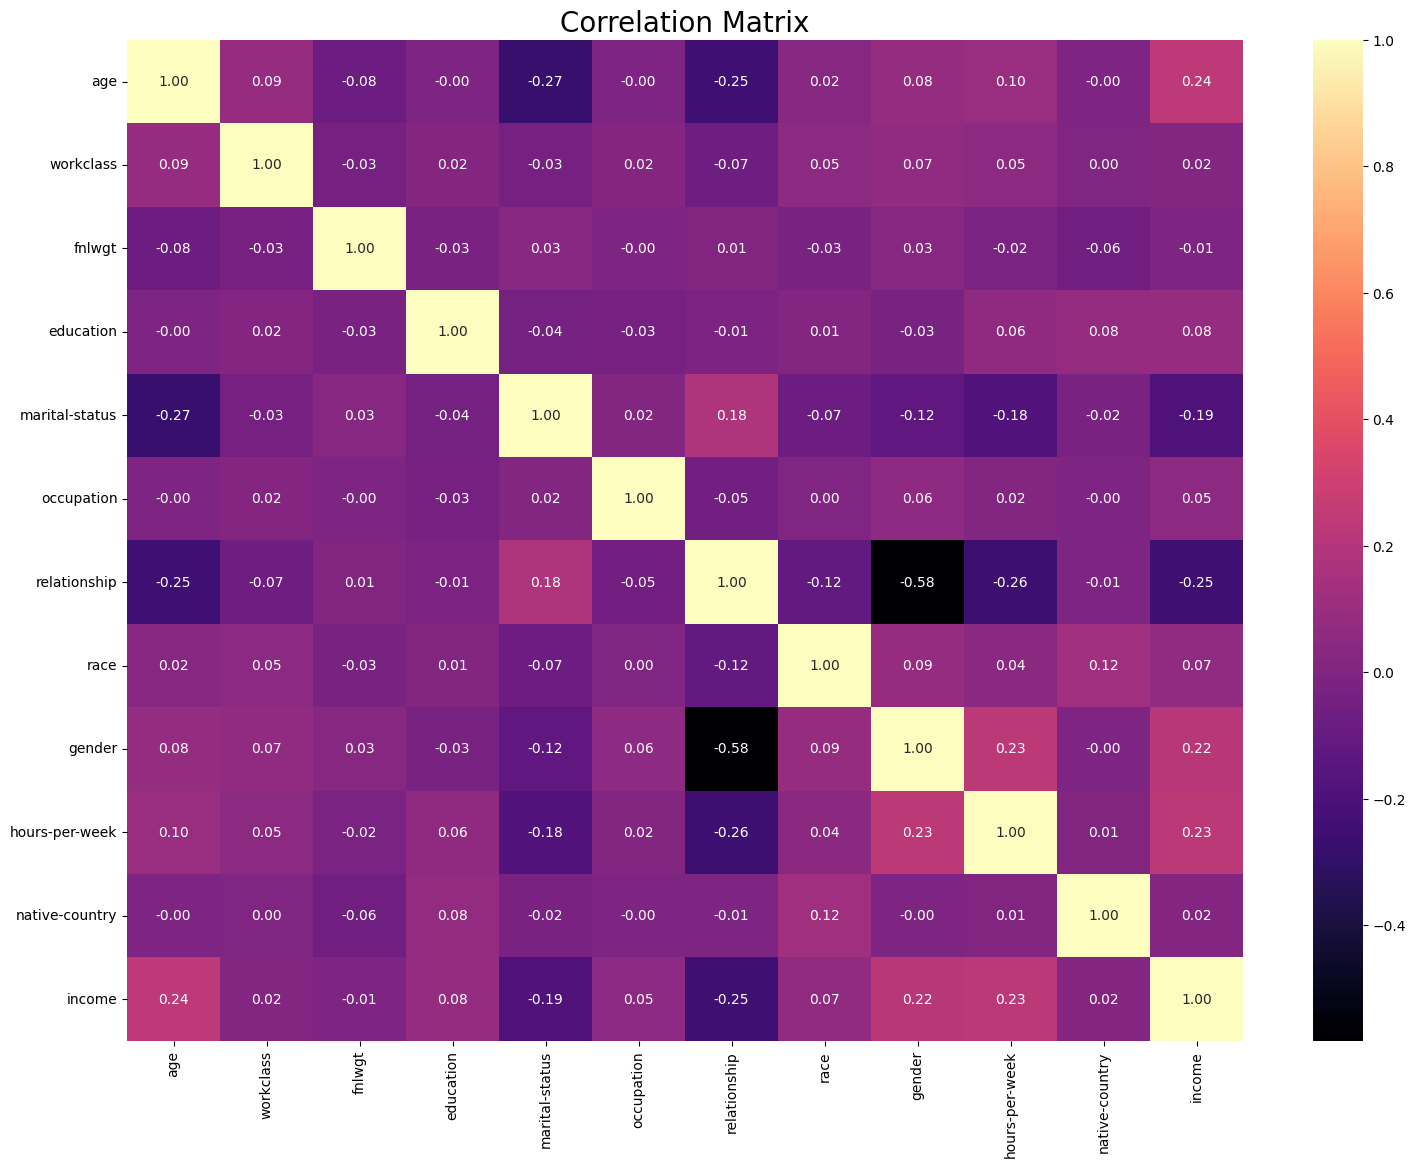

In [22]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()